Model for vehicle velocity control.

http://apmonitor.com/pdc/index.php/Main/SpeedControl

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

$m \frac{dv(t)}{dt} = F_p u(t) - \frac{1}{2} \rho A C_d v(t)^2$

In [3]:
# Mass (car + load), kg
m = 700

# Thrust parameter, (N / %pedal)
F_p = 30

# Air density, kg/m^3
rho = 1.225 

# vehicle cross-sectional area (m^2)
A = 5

# Drag coefficient
C_d = 0.24

def vehicle_model(v, t, u_func):
    
    u = u_func(t)
    
    drive = F_p * u
    drag = 0.5 * rho * A * C_d * (v**2)
    
    return (1. / m) * (drive - drag)
    

In [4]:
step_t = 5
step_val = 50

def step_input(t):
    return 0 if t < step_t else step_val

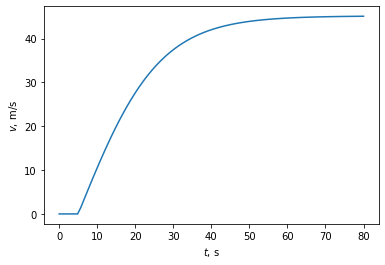

In [5]:
t = np.linspace(0, 80, 100)

y_sim = odeint(vehicle_model, 0, t, args=(step_input,))

plt.plot(t, y_sim)
plt.xlabel('$t$, s')
plt.ylabel('$v$, m/s')
plt.show()